In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_AN_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,0.772910,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,NaN,0.588090,NaN,2.787000,NaN,NaN,1.53750,0.99942,NaN,NaN,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	52
float64		column 2	118
float64		column 3	66
float64		column 4	26
float64		column 5	91
float64		column 6	66
float64		column 7	105
float64		column 8	79
float64		column 9	91
float64		column 10	104
float64		column 11	65
float64		column 12	79


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,748.000000,682.000000,734.000000,774.000000,709.000000,734.000000,695.000000,721.000000,709.000000,696.000000,735.000000,721.000000
mean,1.477849,1.278958,1.951925,1.912017,2.007570,1.994034,1.952105,2.006432,2.003271,1.983180,1.954315,1.967696
std,2.747451,3.598890,1.144597,1.157898,1.162162,1.145559,1.176889,1.125064,1.139381,1.145380,1.169269,1.115592
min,-4.692600,-6.336900,0.020547,0.002628,0.021103,0.001674,0.005922,0.004193,0.009630,0.002484,0.002000,0.000288
25%,-0.444185,-0.602950,0.975882,0.918238,1.002300,0.990855,0.923225,1.005500,1.096800,1.038375,0.919565,1.012900
50%,0.523955,0.560365,1.952750,1.867450,2.051000,1.994200,2.001000,2.010400,1.985800,1.971800,1.940000,1.956600
75%,3.973350,4.508575,2.886600,2.921525,3.003100,3.006500,2.986050,2.907200,3.007400,2.982000,2.969200,2.871500
max,6.982200,8.018800,3.992600,3.997300,3.998500,3.997500,3.997800,3.998200,3.988300,3.998800,3.990900,3.998300


<AxesSubplot:>

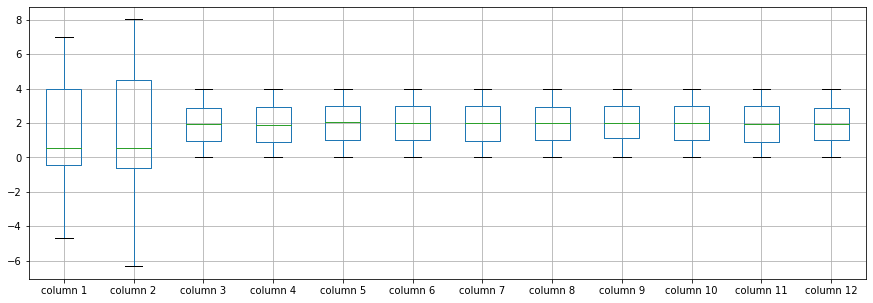

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.477849
column 2     1.278958
column 3     1.951925
column 4     1.912017
column 5     2.007570
column 6     1.994034
column 7     1.952105
column 8     2.006432
column 9     2.003271
column 10    1.983180
column 11    1.954315
column 12    1.967696
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.413080,-0.015790,0.006005,0.019740,0.046191,-0.008971,0.020877,-0.013211,0.014007,0.013780,0.039052
column 2,-0.413080,1.000000,-0.005584,-0.012048,-0.029442,-0.011390,0.058545,-0.017346,0.008519,-0.038397,-0.085932,0.040404
column 3,-0.015790,-0.005584,1.000000,-0.063085,0.082301,-0.008043,0.030111,0.007601,0.020174,-0.027655,-0.044762,-0.028691
column 4,0.006005,-0.012048,-0.063085,1.000000,-0.002479,-0.036426,0.028954,0.044414,-0.039218,0.054807,0.036703,-0.049797
column 5,0.019740,-0.029442,0.082301,-0.002479,1.000000,0.054819,0.005247,0.021384,-0.035812,-0.038311,-0.005615,0.009683
column 6,0.046191,-0.011390,-0.008043,-0.036426,0.054819,1.000000,-0.046693,0.025111,0.033200,0.016790,-0.021510,-0.013945
column 7,-0.008971,0.058545,0.030111,0.028954,0.005247,-0.046693,1.000000,-0.047127,-0.009116,-0.035488,-0.015982,-0.008059
column 8,0.020877,-0.017346,0.007601,0.044414,0.021384,0.025111,-0.047127,1.000000,-0.058947,-0.032100,0.005448,-0.053437
column 9,-0.013211,0.008519,0.020174,-0.039218,-0.035812,0.033200,-0.009116,-0.058947,1.000000,0.051195,-0.012501,-0.016121
column 10,0.014007,-0.038397,-0.027655,0.054807,-0.038311,0.016790,-0.035488,-0.032100,0.051195,1.000000,-0.051045,0.009461


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+60,12+60+60,12+60+60,12+60+60+60+60,12+60+60+60,12+60+60,12+60,12], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.52009552001953
Epoch: 1 , loss: 26.27520191192627
Epoch: 2 , loss: 25.333361740112306
Epoch: 3 , loss: 22.19733711242676
Epoch: 4 , loss: 20.931058597564697
Epoch: 5 , loss: 20.41443328857422
Epoch: 6 , loss: 19.983942985534668
Epoch: 7 , loss: 19.82541675567627
Epoch: 8 , loss: 19.4588330078125
Epoch: 9 , loss: 19.079084873199463
Epoch: 10 , loss: 18.91775354385376
Epoch: 11 , loss: 18.82836811065674
Epoch: 12 , loss: 18.736024208068848
Epoch: 13 , loss: 18.547597808837892
Epoch: 14 , loss: 18.324589767456054
Epoch: 15 , loss: 18.134601821899412
Epoch: 16 , loss: 18.144621047973633
Epoch: 17 , loss: 18.18650022506714
Epoch: 18 , loss: 18.0436710357666
Epoch: 19 , loss: 18.062572250366213
Epoch: 20 , loss: 17.80396978378296
Epoch: 21 , loss: 17.80815441131592
Epoch: 22 , loss: 17.898170394897463
Epoch: 23 , loss: 17.935359954833984
Epoch: 24 , loss: 17.89817880630493
Epoch: 25 , loss: 17.78553365707

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
3,0.0,1.090335,0.0,0.530376,0.0,0.025365,-0.331415,0.0,0.0,-1.046282,1.936689,0.0
4,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
796,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
797,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
798,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(61.15840953746313, 248.22200824735242)

In [17]:
NRMS=numerator/denominator
NRMS


0.24638592673264884

In [18]:
new_df.iloc[66,:]

column 1     0.20762
column 2    -0.55052
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.161340,0.067351,3.533700,0.469590,0.679080,3.434400,2.79240,2.77630,1.699100,3.815600,1.746400
1,-0.098505,-0.178570,2.062800,2.921600,0.424720,1.178500,1.680200,1.38880,3.21670,2.923600,0.772910,0.641450
2,-0.169460,0.501530,2.470900,3.065000,1.567600,1.482400,0.921600,2.64240,1.51870,2.531800,2.432800,1.876800
3,-0.136050,1.563125,0.588090,2.486676,2.787000,2.621065,2.561885,1.53750,0.99942,2.613018,2.554939,3.265800
4,0.098830,0.234180,0.429700,1.631200,3.554100,2.271100,0.374250,2.17860,1.31400,1.063200,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.686700,1.576000,0.556120,0.070769,2.074700,0.803040,3.22290,3.49330,1.325500,3.231100,0.005387
796,3.466600,-4.034600,3.100400,1.346100,1.377300,2.288700,0.396130,2.39610,2.46350,1.667500,2.461700,1.226700
797,3.344800,-2.384300,2.031000,2.264600,3.341200,1.537000,1.225600,0.74027,2.49540,1.343300,1.622500,1.585300
798,3.441400,-5.216300,1.577000,1.844000,1.098700,3.424300,0.810810,3.72700,1.18790,0.951120,1.884500,1.143700


In [20]:
imputations[-1].to_excel("4-gauss_AN_10(imp).xlsx", index=False, header=False)